<a href="https://colab.research.google.com/github/lopes-andre/brains/blob/main/Pra%CC%81tica_Regressao_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>BRAINS - Brazilian AI Networks 🧠</center></h1>

<center><i>BRAINS - Brazilian AI Networks - é uma comunidade de estudantes brasileiros que tem como objetivo trazer conteúdo de qualidade sobre AI, Machine Learning e Dados para o Brasil, em Português.</i> 🇧🇷</center>

<h1><center>Prática: Regressão Logística</center></h1>

## Introdução

Este noteebok traz uma abordagem prática para o treino de modelos de **Regressão Logística**, para problemas de **Classificação Binária**.

Nós já discutimos um pouco sobre a teoria dos Modelos de Classificação e da Regressão Logística nos seguintes posts.

- [Modelos de Classificação: Regressão Logística](https://brains.dev/2023/modelos-de-classificacao-regressao-logistica/)


- [Medidas de Performance: Modelos de Classificação](https://brains.dev/2023/medidas-de-performance-modelos-de-classificacao/)

Recomenda-se a leitura destes dois posts antes de iniciar com a parte prática.

Se você já leu... mãos na massa!

## Objetivos

Diabetes é uma das doenças mais frequentes do mundo de hoje e o número de pacientes diabéticos vem crescendo nos últimos anos. A principal causa raiz da diabetes continua desconhecida, mas muitos cientistas acreditam que ambos, fatores genéticos e de estilo de vida, são quesitos importantes.

Dada a seriedade e complexidade da doença, vamos construir um modelo de Classificação Binária para tentar prever se uma pessoa tem probabilidade de desenvolver diabetes ou não. 

## Descrição dos Dados

Vamos trabalhar sobre um dataset originalmente do National *Institute of Diabetes and Digestive and Kidney Diseases*, hoje disponível no Kaggle, chamado [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

A base de dados é constituída apenas por mulheres com mais de 21 anos e descendentes do povo Pima da Índia. O dataset possui 9 colunas.

Sabemos que entender os dados é passo fundamental do trabalho de um Cientista de Dados. Portanto, vamos analisar uma descrição detalhada das variáveis disponíveis.

1. ***Class:*** variável de classe, ou **variável alvo** (0: a pessoa não é diabética / 1: a pessoa é diabética)

2. ***Pregnancies***: número de gravidezes

3. ***Glucose:*** concentração de glicose plasmática durante 2 horas em um teste oral de tolerância à glicose

4. ***BloodPressure:*** pressão sanguínea diastólica (mm Hg)

5. ***SkinThickness:*** espessura da dobra cutânea do tríceps (mm)

6. ***Insulin:*** nível de insulina no sangue (mu U/ml)

7. ***BMI:*** IMC, Índice de Massa Corporal (peso em kg/(altura em m)^2)

8. ***Pedigree:*** função hereditária -  uma função que classifica a probabilidade de diabetes baseada no histórico familiar exclusivamente.

9. ***Age:*** idade em anos

<br><br>
## Importando as Bibliotecas

In [ ]:
# Manuseio dos dados
import numpy as np
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Divisão da base de dados
from sklearn.model_selection import train_test_split

# API para modelo de Regressão Logística
import statsmodels.api as sm

# Avaliação da performance do modelo
from sklearn import metrics
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             recall_score, 
                             precision_score)

Nós iremos construir nosso modelo de Regressão Logística usando a biblioteca [`statsmodels`](https://www.statsmodels.org/stable/index.html), que traz diversas funções matemáticas e estatísticas de forma conveniente para nós.

Entretanto, seria perfeitamente possível utilizar outras bibliotecas, como a [`scikit-learn`](https://scikit-learn.org/stable/), por exemplo, para a construção do mesmo modelo.

<br>

## Carregando e Explorando os Dados

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
# Local do dataset online
url_dataset = 'https://raw.githubusercontent.com/lopes-andre/datasets/main/pima-indians-diabetes.csv'

# Carrega os dados em um DataFrame
data = pd.read_csv(url_dataset)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Verifica o shape dos dados
print(f'Shape dos dados: {data.shape}\n')

print(f'Esta base de dados tem {data.shape[0]} linhas e {data.shape[1]} colunas.')

Shape dos dados: (768, 9)

Esta base de dados tem 768 linhas e 9 colunas.


In [ ]:
# Resumo Estatístico dos dados
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Observações

- Nós podemos com apenas uma linha de código ver todo o resumo estatístico dos dados.


- Este método nos retorna as seguintes informações:

  - Contagem de entradas de cada coluna.

  - Média.

  - Desvio Padrão.

  - Valores mínimo e máximo de cada coluna.

  - Primeiro quartil, Mediana e terceiro quartil.
  

- Todas as entradas numéricas são retornadas. Neste caso, todas as colunas.

In [ ]:
# Verifica os tipos das colunas e quantidade de entradas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Verifica dados nulos/faltantes
data.isnull().values.any()

False

#### Observações

- Note que não temos dados nulos. Todas as colunas estão com contagem de `768 non-null` e temos 768 linhas na base. Usamos também o método `.isnull()` seguido por `.any()` para verificar a presença de algum dado nulo. Esta cadeia de métodos nos retorna apenas `False`, ou seja, sem dados nulos.


- Todas as colunas são de dados numéricos (Dtype do tipo `int64` ou `float64`). Não vamos precisar tratar colunas categóricas com técnicas como [OneHotEncoding](https://arthurlambletvaz.medium.com/one-hot-encoding-o-que-%C3%A9-cd2e8d302ae0).

## Análise de Dados Univariada

A **Análise de Dados Univariada** irá focar na distribuição das variáveis de forma individual. Iremos usar **Histogramas** ( `data.hist()` ) para analisar a distribuição dos dados.

Iremos usar o próprio Pandas para plotar todas as distribuições de uma só vez.

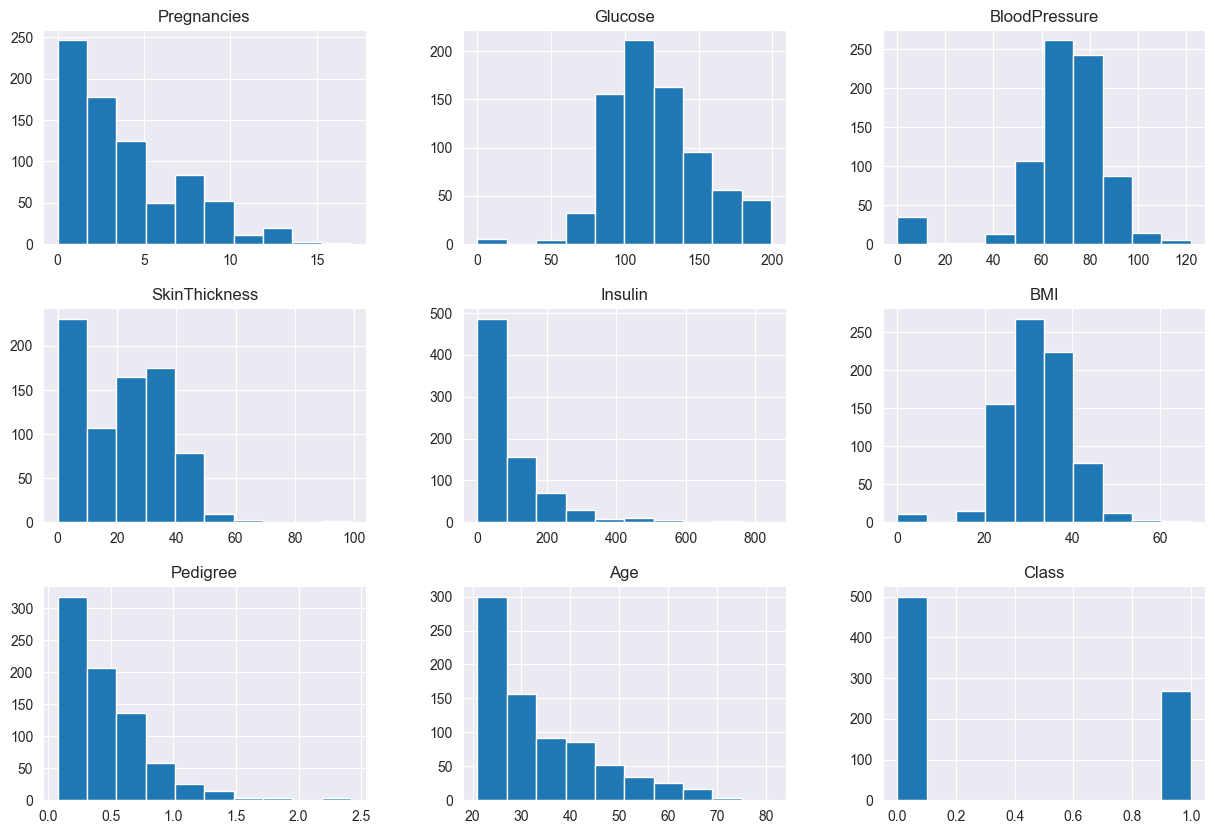

In [ ]:
# Plota Histogramas para toda a base de dados
sns.set_style('darkgrid')
data.hist(figsize=(15,10))
plt.show()

#### Observações

- Reparem que as colunas `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` e `BMI` têm observações com valores de `0`, o que não é possível. Essas entradas representam erros nos dados e nós precisamos corrigi-los.


- Iremos substituir os valores de `0` em todas as colunas, exceto nas de `Pregnancies` e `Class`, por `np.nan`, um marcador do NumPy que denota um valor não-numérico dentro de uma coluna numérica (NaN significa *Not a Number*).


Esta substituição irá nos permitir lidar com os valores faltantes de forma mais elegante.

In [ ]:
# Colunas para converter 0 em NaN
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 
        'Insulin', 'BMI', 'Pedigree']

In [ ]:
# Substitui 0 em NaN
data[cols] = data[cols].replace(0, np.nan)

In [ ]:
# Verifica valores nulos novamente
data.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Pedigree           0
Age                0
Class              0
dtype: int64

## Lidando com Valores Faltantes

Após substituirmos os valores de `0` em colunas onde zero é impossível por `np.nan`, descobrimos que na verdade temos sim valores faltantes que precisam ser imputados.

**Existem diversas formas de tratar valores faltantes.** Nós podemos remover as entradas, substituir os valores faltantes com a Média ou Mediana das colunas, ou muitas outras abordagens.

Ao invés de dropar/remover essas linhas com valores faltantes, iremos **substituir os valores faltantes** com a sua **Média**.

In [ ]:
# Imputando os valores nulos com a média
data[cols] = data[cols].fillna(data[cols].mean())

In [ ]:
# Verifica valores nulos novamente
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Class            0
dtype: int64

Não temos mais dados nulos/faltantes.

Podemos voltar a fazer uma análise gráfica mais coerente.

## Análise de Dados Univariada

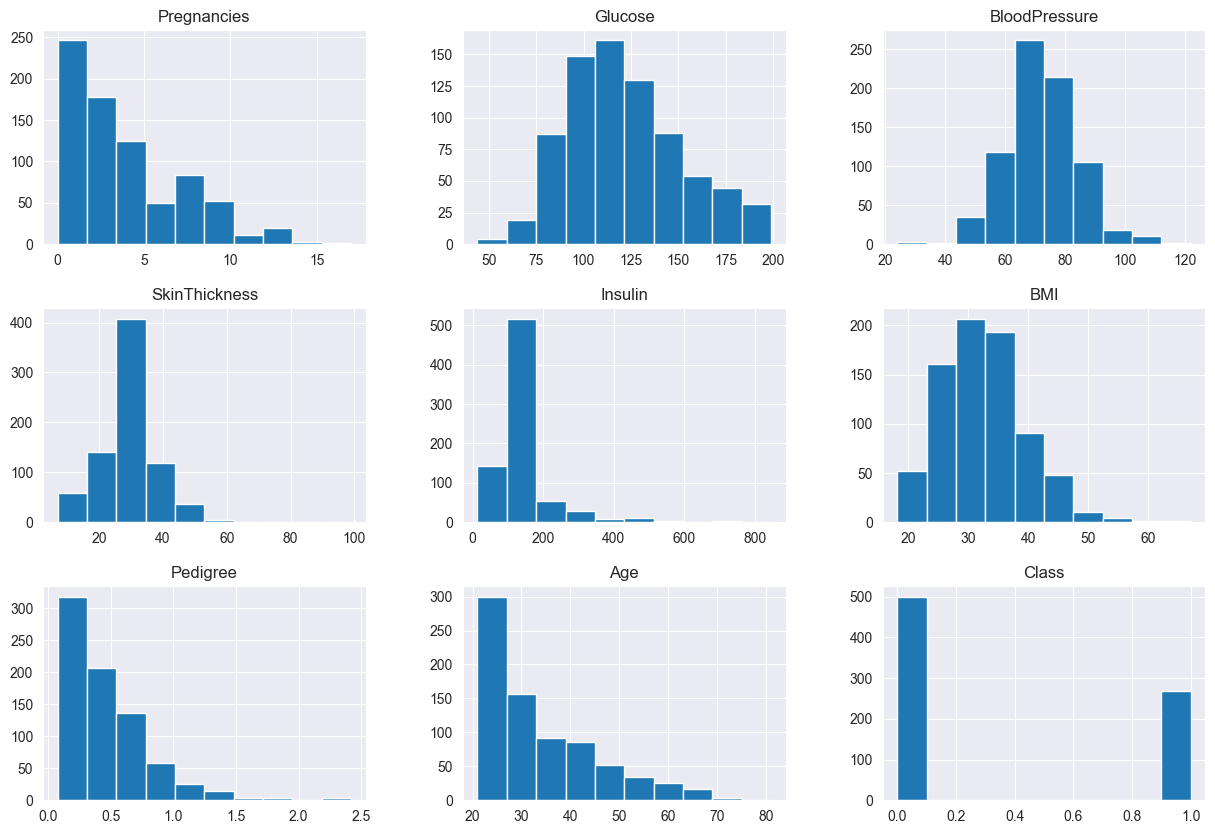

In [ ]:
# Plota Histogramas para toda a base de dados
sns.set_style('darkgrid')
data.hist(figsize=(15,10))
plt.show()

## Análise de Dados Bivariada

A **Análise de Dados Bivariada** entre as diferentes variáveis pode ser feita usando o gráfico de **Mapa de Calor** (usando `sns.heatmap()` ) sobre a tabela de correlação dos dados ( `data.corr()` ).

Nesta representação gráfica conseguimos observar a correlação entre as diferentes variáveis da nossa base de dados. Note que os valores de correlação variam de $-1$ a $1$, onde $-1$ representa uma correlação máxima negativa (ou seja, quando uma variável aumenta a outra diminui) e $1$ representa uma correlação máxima positiva (quando uma variável aumenta, a outra também aumenta). Uma correlação de $0$ indica que não há correlação nenhuma entre as duas variáveis.

A biblioteca Seaborn cria um Mapa de Calor refletindo estas correlações.

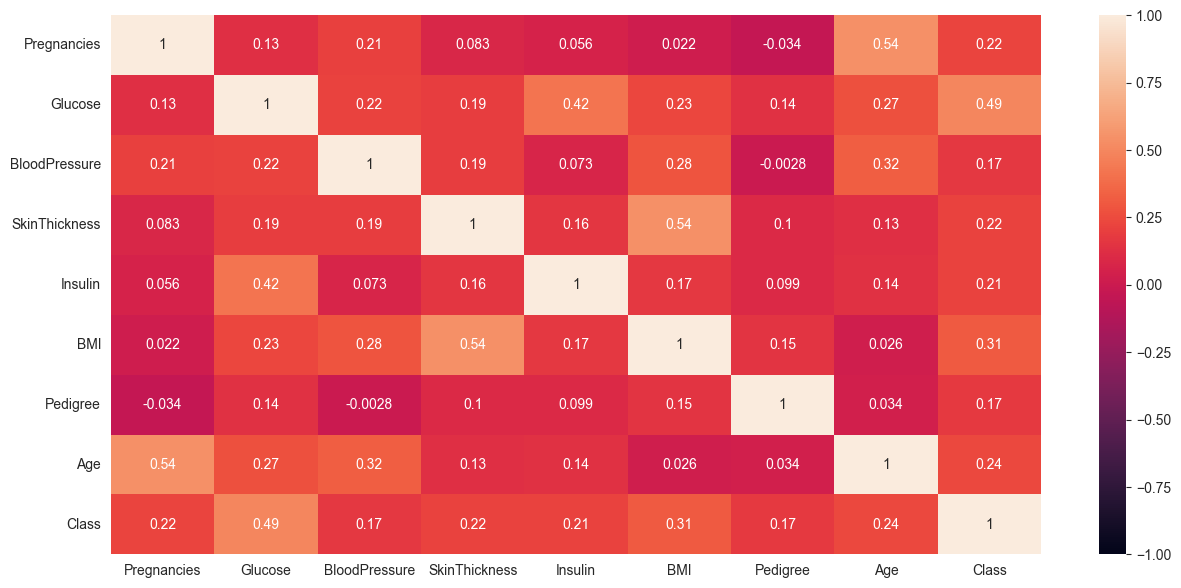

In [ ]:
# Mapa de Calor para Correlação
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

#### Observações

- Não temos nenhum caso de correlação significativamente alta, tanto positiva quanto negativa, entre as variáveis.


- A escala de cores nos ajuda a identificar os casos de alta correlação.


Note que a correlação entre uma variável e ela mesma é sempre $1$, portanto temos esta diagonal no mapa de calor com $1$ e uma cor mais clara.

## Distribuição da Variável Alvo

Por ser um problema de Classificação Binária, é importante analisarmos a distribuição das duas classes da nossa variável alvo.

Conversamos brevemente sobre classes desbalanceadas e os problemas que podem trazer para o modelo no post [Medidas de Performance: Modelos de Classificação](https://brains.dev/2023/medidas-de-performance-modelos-de-classificacao/). Vamos ver se temos este desbalanceio.

In [ ]:
# Contagem dos valores em cada classe
data['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

In [ ]:
# Porcentagem dos valores em cada classe
data['Class'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Class, dtype: float64

#### Observações

- A classe 0 (não diabéticos) tem 500 exemplos. Isto representa 65% da nossa base de dados.


- A classe 1 (diabéticos) tem 268 exemplos. Em torno de 35% dos dados.

<center><strong>Neste ponto, finalizamos a preparação dos dados</strong></center>

<br>

## Divisão dos Dados

Iremos agora separar as características de cada paciente, as variáveis independentes, da nossa variável alvo, ou variável dependente.

Lembre-se que chamamos de `X` o conjunto de características (*features*) e chamamos de `y` a nossa resposta de interesse, nossa variável alvo a ser descoberta (*target*).

Será necessário também adicionar uma constante de `1.0` à matriz `X` de características para que o algoritmo possa realizar seus cálculos de forma precisa e eficiente.

In [ ]:
# Variáveis independentes (características)
X = data.drop(['Class'], axis=1)

# Variável dependente (alvo)
y = data['Class']

In [ ]:
# Adiciona a constante
X = sm.add_constant(X)

Precisamos agora dividir a nossa base de dados entre Treino e Teste. Já discutimos a importância desta divisão, onde separamos uma parte dos dados (70% neste caso) para realizarmos o treino do modelo e uma outra parte (30%) para testarmos e vermos se o modelo de fato aprendeu, ou se apenas "decorou" respostas e se "ajustou demais" ao problema (*Overfitting*).

Como temos um certo desbalanceio na nossa variável alvo, é interessante mantermos as mesmas proporções de classes positivas e negativas tanto na base de treino quanto na de teste. A divisão é aleatória, e não devemos perder esta proporção. 

Para isso, iremos fazer uso do argumento `stratify=y` da função `train_test_split()` disponível na biblioteca Scikit-learn. Este argumento irá manter as devidas proporções das classes de `y` para treino e teste.

In [ ]:
# Divisão dos dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.30,
                                                   random_state=1,
                                                   stratify=y) # mantém as proporções das classes

## Treino do Modelo de Regressão Logística

O treino do modelo é extremamente simples - a dificuldade está na preparação correta dos dados.

Nós iremos usar o algoritmo de [Logit](https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.html) para encontrar os parâmetros (ou coeficientes) que se adequam melhor à nossa Regressão.

Para isso iremos instanciar um objeto `sm.Logit()` e fazermos com que ele se adapte aos nossos dados, ou seja, que ele treine sobre os dados, com o método `.fit()`.

In [ ]:
# Instancia e treina o modelo
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.449508
         Iterations 6


Com apenas mais uma linha de código podemos ter todo o resumo da nossa regressão, que nos traz informações muito importantes como o coeficiente ($w$, ou *weights*) de cada característica, entre outras.

In [ ]:
# Imprime o resumo da Regressão Logística
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            8
Date:                Thu, 19 Jan 2023   Pseudo R-squ.:                  0.3045
Time:                        17:24:00   Log-Likelihood:                -241.39
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 2.518e-41
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.7226      1.021     -9.522      0.000     -11.724      -7.721
Pregnancies       0.1445      0.039      3.706      0.000       0.068       0.221
Glucose           0.0363      0.005     

#### Observações

- Os coeficientes da Regressão Logística são em termos logarítmicos, em *Log of Odds* ( $\log(\text{odds})$ ).

Não temos um valor simples de ser interpretado como o $R^2$ da Regressão Linear como antes. Para avaliar como o modelo está se saindo, precisamos ver a sua **Matriz de Confusão**.

## Matriz de Confusão

A Matriz de Confusão é uma representação gráfica que nos permite visualizar de forma simples e rápida os erros e acertos do modelo (TP, TN, FP e FN). Para entender melhor a interpretação da matriz e as siglas, leia o nosso post [Medidas de Performance: Modelos de Classificação](https://brains.dev/2023/medidas-de-performance-modelos-de-classificacao/).

Para podermos exibir a Matriz de Confusão, vamos precisar usar o método `.predict()` para termos as predições dos modelos armazenadas. 

Vamos usar um Limiar de Classificação de `0.5`. Tudo que tiver uma probabilidade de ser classe 1 maior que 0.5 vai ser classificado como tal. Todo o resto como classe 0.

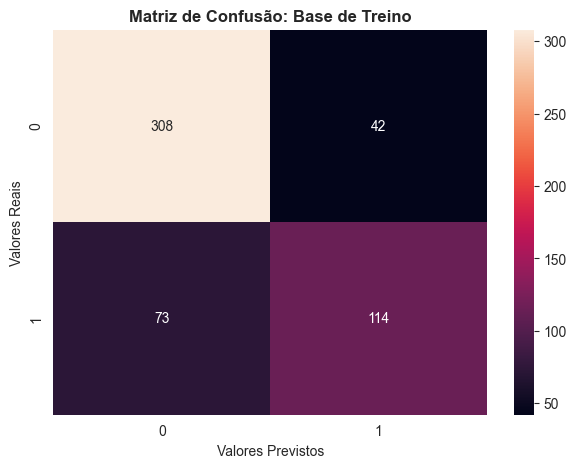

In [ ]:
# Realiza as predições na base de treino
# O limiar de classificação padrão é 0.5
pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)

# Gera a Matriz de Confusão
cm = confusion_matrix(y_train, pred_train)

# Plot da Matriz de Confusão
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Matriz de Confusão: Base de Treino', weight='bold')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()

#### Observações

- Podemos ver que de 537 exemplos que temos na base de treino, acertamos 422. 

- Precisamos dos quatro quadrantes para calcular nossas métricas. Foram 114 TPs, 308 TNs, 42 FPs e 73 FNs.

Com as informações da Matriz de Confusão, podemos verificar as métricas sobre nossa base de treino.

## Métricas de Performance do Modelo

Vamos iremos avaliar as métricas de performance do modelo de classificação, como a Acurácia, Precisão e Recall.

In [ ]:
# Acurácia
acc = accuracy_score(y_train, pred_train)
# Precisão
prec = precision_score(y_train, pred_train)
# Recall
rec = recall_score(y_train, pred_train)

print(f'Acurácia na base de treino: {round(acc, 2) * 100}%')
print(f'Precisão na base de treino: {round(prec, 2) * 100}%')
print(f'Recall na base de treino: {round(rec, 2) * 100}%')

Acurácia na base de treino: 79.0%
Precisão na base de treino: 73.0%
Recall na base de treino: 61.0%


## Conclusão

O modelo foi treinado com sucesso. A Acurácia nos diz que o nosso modelo consegue acertar em torno de 80% das predições. A Precisão que quando o modelo classifica alguém como propenso à diabetes, ele acerta 73% das vezes. O Recall nos indica que o modelo detecta 61% dos diabéticos.

Perceba que o modelo teve foco maior em reduzir os FPs, de acordo com a métrica de Precisão maior que a de Recall.

O modelo está longe do ideal. Porém, em breve iremos ver modelos mais complexos e técnicas de como melhorar os resultados das classificações.

Devemos fazer a mesma avaliação acima para a base de teste, mas vou deixar para vocês fazerem essa etapa. Vamos encerrar por aqui esse laboratório de Regressão Logística.

<br>

Caso tenha ficado com alguma dúvida, entre em contato conosco pelo site do [brains.dev](https://brains.dev). 

Colabore com a nossa comunidade trazendo conteúdo de qualidade em Português, seja conteúdo próprio ou traduzido. Iremos ficar muito felizes de receber material de vocês.

Para conhecer mais sobre nós e saber como colaborar, visite o post abaixo.

- [**Bem-vindos ao BRAINS**](https://brains.dev/2022/bem-vindos-ao-brains/)

É sempre um prazer estar com vocês por aqui!

<br>

<center><h2>#NoBrains #NoGains 🧠</h2></center>